### 목표 : 많은 특성의 데이터셋에서 과대적합 해결
- 데이터 : perch3.csv
- 피쳐 : Length,Height,Width
- 타겟 : Weight
- [조건]
    * 특성 추가 => degree = 5로 설정
    * 특성을 기반으로 무게 예측 => 지도학습 + 회귀

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import PolynomialFeatures

In [17]:
perchDF = pd.read_csv('../data/perch3.csv')
perchDF

,Weight,Length,Height,Width
0,5.9,8.4,2.1120,1.4080
1,32.0,13.7,3.5280,1.9992
2,40.0,15.0,3.8240,2.4320
3,51.5,16.2,4.5924,2.6316
4,70.0,17.4,4.5880,2.9415
5,100.0,18.0,5.2224,3.3216
6,78.0,18.7,5.1992,3.1234
7,80.0,19.0,5.6358,3.0502
8,85.0,19.6,5.1376,3.0368
9,85.0,20.0,5.0820,2.7720


In [18]:
poly = PolynomialFeatures(degree=5, include_bias=False)
poly.fit(perchDF[perchDF.columns[1:]])
feature5D = pd.DataFrame(poly.transform(perchDF[perchDF.columns[1:]]))
feature5D.columns = poly.get_feature_names_out()

In [19]:
feature5D

,Length,Height,Width,Length^2,Length Height,Length Width,Height^2,Height Width,Width^2,Length^3,...,Length Height^3 Width,Length Height^2 Width^2,Length Height Width^3,Length Width^4,Height^5,Height^4 Width,Height^3 Width^2,Height^2 Width^3,Height Width^4,Width^5
0,8.4,2.1120,1.4080,70.56,17.74080,11.82720,4.460544,2.973696,1.982464,592.704,...,111.420136,74.280090,49.520060,33.013373,42.021308,28.014206,18.676137,12.450758,8.300505,5.533670
1,13.7,3.5280,1.9992,187.69,48.33360,27.38904,12.446784,7.053178,3.996801,2571.353,...,1202.714480,681.538205,386.204983,218.849490,546.566340,309.720926,175.508525,99.454831,56.357737,31.936051
2,15.0,3.8240,2.4320,225.00,57.36000,36.48000,14.622976,9.299968,5.914624,3375.000,...,2039.898133,1297.341072,825.087209,524.741656,817.691377,520.038031,330.735484,210.342232,133.774139,85.078114
3,16.2,4.5924,2.6316,262.44,74.39688,42.63192,21.090138,12.085360,6.925319,4251.528,...,4129.086843,2366.105944,1355.858462,776.952602,2042.671556,1170.519655,670.747218,384.360766,220.251675,126.211634
4,17.4,4.5880,2.9415,302.76,79.83120,51.18210,21.049744,13.495602,8.652422,5268.024,...,4942.974030,3169.084156,2031.791858,1302.640748,2032.904823,1303.354302,835.618282,535.739141,343.477917,220.213664
5,18.0,5.2224,3.3216,324.00,94.00320,59.78880,27.273462,17.346724,11.033027,5832.000,...,8515.893768,5416.358904,3444.963567,2191.098151,3884.638980,2470.744645,1571.466263,999.498763,635.710610,404.330646
6,18.7,5.1992,3.1234,349.69,97.22504,58.40758,27.031681,16.239181,9.755628,6539.203,...,8208.783173,4931.395862,2962.517663,1779.721432,3799.116573,2282.305106,1371.086276,823.674964,494.819661,297.261065
7,19.0,5.6358,3.0502,361.00,107.08020,57.95380,31.762242,17.190317,9.303720,6859.000,...,10374.057143,5614.633077,3038.744067,1644.624925,5685.620438,3077.163750,1665.418373,901.355464,487.830376,264.022892
8,19.6,5.1376,3.0368,384.16,100.69696,59.52128,26.394934,15.601864,9.222154,7529.536,...,8071.479104,4770.995746,2820.102748,1666.943325,3579.327533,2115.715870,1250.585089,739.212239,436.943267,258.274158
9,20.0,5.0820,2.7720,400.00,101.64000,55.44000,25.826724,14.087304,7.683984,8000.000,...,7276.578246,3969.042680,2164.932371,1180.872202,3389.793976,1848.978532,1008.533745,550.109315,300.059627,163.668887


In [20]:
pd.concat([perchDF['Weight'], feature5D], axis=1).corr()

,Weight,Length,Height,Width,Length^2,Length Height,Length Width,Height^2,Height Width,Width^2,...,Length Height^3 Width,Length Height^2 Width^2,Length Height Width^3,Length Width^4,Height^5,Height^4 Width,Height^3 Width^2,Height^2 Width^3,Height Width^4,Width^5
Weight,1.000000,0.958656,0.968441,0.963943,0.982416,0.989600,0.988456,0.988481,0.987965,0.976745,...,0.976625,0.973754,0.966105,0.954107,0.971038,0.973709,0.971014,0.963281,0.950937,0.934471
Length,0.958656,1.000000,0.985584,0.974617,0.988895,0.982759,0.978448,0.969725,0.966038,0.951606,...,0.910719,0.906748,0.898075,0.885123,0.901816,0.903218,0.899359,0.890563,0.877253,0.859918
Height,0.968441,0.985584,1.000000,0.982943,0.978695,0.988285,0.981614,0.989343,0.983747,0.967599,...,0.928429,0.924432,0.915849,0.903105,0.926213,0.927681,0.923962,0.915387,0.902381,0.885430
Width,0.963943,0.974617,0.982943,1.000000,0.967603,0.974677,0.987686,0.974125,0.987468,0.989545,...,0.923090,0.929629,0.931308,0.928426,0.910127,0.922335,0.929247,0.931035,0.927984,0.920464
Length^2,0.982416,0.988895,0.978695,0.967603,1.000000,0.995484,0.990447,0.983469,0.979020,0.963626,...,0.953722,0.948954,0.939227,0.924994,0.944177,0.945003,0.940282,0.930364,0.915698,0.896804
Length Height,0.989600,0.982759,0.988285,0.974677,0.995484,1.000000,0.993905,0.996197,0.990906,0.974767,...,0.965499,0.960560,0.950743,0.936502,0.960518,0.961215,0.956414,0.946471,0.931841,0.913045
Length Width,0.988456,0.978448,0.981614,0.987686,0.990447,0.993905,1.000000,0.989460,0.995989,0.991187,...,0.963897,0.966304,0.963615,0.956196,0.951290,0.959504,0.962117,0.959374,0.951631,0.939332
Height^2,0.988481,0.969725,0.989343,0.974125,0.983469,0.996197,0.989460,1.000000,0.994243,0.977822,...,0.968609,0.963637,0.953905,0.939868,0.967976,0.968634,0.963889,0.954102,0.939726,0.921280
Height Width,0.987965,0.966038,0.983747,0.987468,0.979020,0.990906,0.995989,0.994243,1.000000,0.994610,...,0.967496,0.969773,0.967078,0.959779,0.959393,0.967487,0.970080,0.967421,0.959868,0.947862
Width^2,0.976745,0.951606,0.967599,0.989545,0.963626,0.974767,0.991187,0.977822,0.994610,1.000000,...,0.955727,0.964991,0.969187,0.968589,0.940674,0.955823,0.965492,0.969818,0.969059,0.963568


In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [22]:
X_train, X_test, y_train, y_test = train_test_split(feature5D, perchDF['Weight'],
                                                    random_state=5)

In [23]:
print(f'Train => {X_train.shape}, {y_train.shape}   Test => {X_test.shape}, {y_test.shape}')

Train => (42, 55), (42,)   Test => (14, 55), (14,)


In [24]:
std_scaler = StandardScaler()
std_scaler.fit(X_train)

StandardScaler()

In [25]:
scaled_X_train = std_scaler.transform(X_train)
scaled_X_test = std_scaler.transform(X_test)

In [26]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(scaled_X_train, y_train)

LinearRegression()

In [27]:
score_train = lr_model.score(scaled_X_train, y_train)
score_test = lr_model.score(scaled_X_test, y_test)

In [28]:
score_train, score_test

(1.0, -38.767868061603046)

### 규제 : 가중치 값을 조절해서 과대적합 문제 해결
- Ridge : 모든 피쳐에 가중치를 0에 가깝게 조절
- Lasso : 특정 피쳐의 가중치를 0으로 해서 차원 축소 부여

[규제 1] Ridge

In [29]:
from sklearn.linear_model import Ridge

In [30]:
ridge_model = Ridge()
ridge_model.fit(scaled_X_train, y_train)

Ridge()

In [31]:
score_train = ridge_model.score(scaled_X_train, y_train)
score_test = ridge_model.score(scaled_X_test, y_test)

In [32]:
score_train, score_test

(0.9874355208005008, 0.9914491207423642)

In [34]:
# 모델 파라미터
print(ridge_model.n_iter_, ridge_model.coef_, ridge_model.intercept_)

None [ 1.83176874e+00 -7.23677789e+00  1.03067055e+01  1.57775249e+01
  1.18446480e+01  1.67466597e+01  9.57952490e+00  1.47797173e+01
  2.48615142e+01  1.85163425e+01  1.67577526e+01  1.46142404e+01
  1.58382863e+01  1.38108100e+01  1.64490445e+01  1.56379186e+01
  1.39352928e+01  1.71480760e+01  2.50779150e+01  1.42694832e+01
  1.39921892e+01  6.23690826e+00  1.41806030e+01  6.32646330e+00
  2.93976268e+00  1.47629117e+01  7.00986521e+00  3.97399179e+00
  5.70584401e+00  1.56796396e+01  8.23737024e+00  5.75159002e+00
  8.24469917e+00  1.54675618e+01  5.86439125e+00  6.81074624e+00
 -5.88111799e+00  8.02129126e+00 -4.97701429e+00 -1.36851639e+01
  9.44134707e+00 -3.67900627e+00 -1.22792895e+01 -1.61590708e+01
  1.10232306e+01 -2.01766706e+00 -1.03096090e+01 -1.36546600e+01
 -1.21067571e+01  1.27255386e+01 -1.99919223e-02 -7.79070771e+00
 -1.04001988e+01 -7.93557014e+00 -7.20881695e-01] 365.6404761904762


In [37]:
# ===> 최적의 규제 강도 설정 값 찾기
alphas = [0.1, 1., 10., 20., 30.]
ridge_score = [[],[]]

for a in alphas:
    ridge_model = Ridge(alpha=a)
    ridge_model.fit(scaled_X_train, y_train)
    
    score_train = ridge_model.score(scaled_X_train, y_train)
    score_test = ridge_model.score(scaled_X_test, y_test)
    
    ridge_score[0].append(score_train)
    ridge_score[1].append(score_test)

In [38]:
# 테스트 점수가 가장 큰 알파값    
best_alpha = alphas[ridge_score[1].index(max(ridge_score[1]))]
best_alpha

1.0

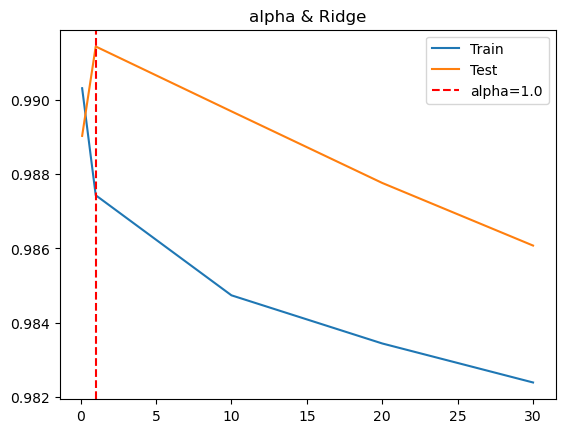

In [42]:
# 학습 및 테스트 점수 기반 시각화
plt.plot(alphas, ridge_score[0], label='Train')
plt.plot(alphas, ridge_score[1], label='Test')

plt.axvline(best_alpha, linestyle='--', color='red', label=f'alpha={best_alpha}')
plt.legend()
plt.title('alpha & Ridge')
plt.show()

[규제 2] Lasso

In [43]:
from sklearn.linear_model import Lasso

In [44]:
lasso_model = Lasso()
lasso_model.fit(scaled_X_train, y_train)

C:\Users\kdp\anaconda3\envs\EXAM_ML\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.117e+03, tolerance: 4.884e+02
  model = cd_fast.enet_coordinate_descent(


Lasso()

In [45]:
score_train = lasso_model.score(scaled_X_train, y_train)
score_test = lasso_model.score(scaled_X_test, y_test)

In [46]:
score_train, score_test

(0.9865761752892273, 0.9912639062921962)

In [47]:
# 모델 파라미터
print(lasso_model.n_iter_, lasso_model.coef_, lasso_model.intercept_)

1000 [ 0.          0.          0.          8.39678696  0.          0.
 13.70952971  0.         87.23199451 91.06954235 16.61716411  0.
 35.69479723  0.          0.         46.93195311  0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.         41.8984421
  0.          0.          0.          0.          0.          0.
  0.          0.          0.         -0.          0.          0.
 -0.         -0.          0.          0.         -0.         -0.
 -0.          0.          0.          0.         -0.         -0.
 -0.        ] 365.6404761904762


In [50]:
# ===> 최적의 규제 강도 설정 값 찾기
alphas = [0.1, 1., 10., 20., 30.]
lasso_score = [[],[]]

for a in alphas:
    lasso_model = Lasso(alpha=a, max_iter=10000)
    lasso_model.fit(scaled_X_train, y_train)
    
    score_train = lasso_model.score(scaled_X_train, y_train)
    score_test = lasso_model.score(scaled_X_test, y_test)
    
    lasso_score[0].append(score_train)
    lasso_score[1].append(score_test)

C:\Users\kdp\anaconda3\envs\EXAM_ML\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.908e+02, tolerance: 4.884e+02
  model = cd_fast.enet_coordinate_descent(


In [51]:
best_alpha = alphas[lasso_score[1].index(max(lasso_score[1]))]
best_alpha

1.0

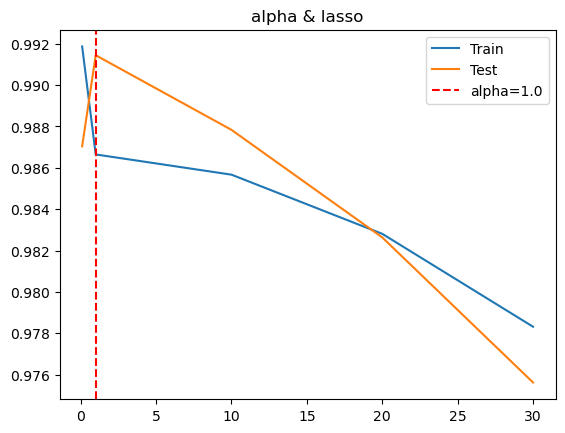

In [53]:
# 학습 및 테스트 점수 기반 시각화
plt.plot(alphas, lasso_score[0], label='Train')
plt.plot(alphas, lasso_score[1], label='Test')

plt.axvline(best_alpha, linestyle='--', color='red', label=f'alpha={best_alpha}')
plt.legend()
plt.title('alpha & lasso')
plt.show()